# Model Recovery 

In [3]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget

import numpy as np
from run_model_recovery import *
import multiprocessing as mp
import matplotlib.pyplot as plt

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

## 1. Model comparison

Just some examples here

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 5.38629, BIC = 15.2018 (done in 6.56 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 630.31, BIC = 640.126 (done in 4.6 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 635.14, BIC = 654.771 (done in 6.24 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1191.15, BIC = 1200.97 (done in 2.75 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 978.129, BIC = 987.944 (done in 3.37 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 645.207, BIC = 659.93 (done in 8.35 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 980.087, BIC = 994.81 (done in 5.91 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 503.652, BIC = 523.283 (done in 8.8 secs)


<IPython.core.display.Javascript object>


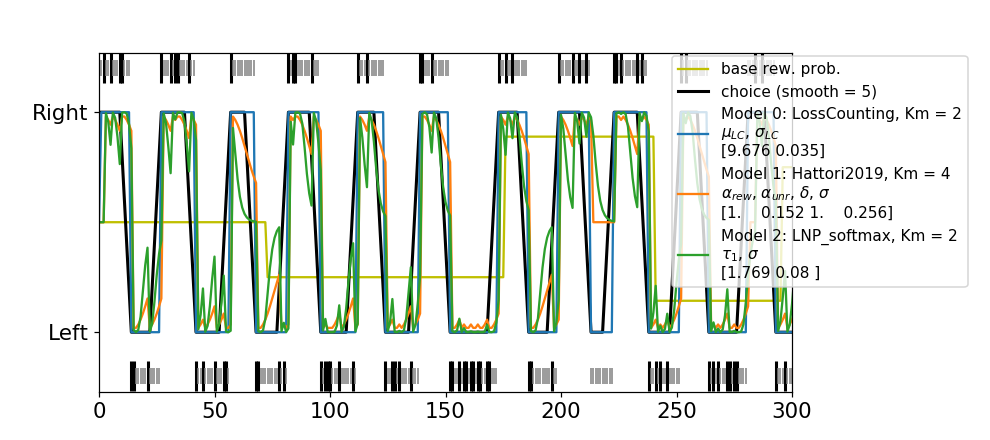

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
0,LossCounting,2,5.39,-0.00,15.20,"$\mu_{LC}$, $\sigma_{LC}$","[9.676, 0.035]"
7,Hattori2019,4,503.65,-108.20,523.28,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[1.0, 0.152, 1.0, 0.256]"
1,LNP_softmax,2,630.31,-135.70,640.13,"$\tau_1$, $\sigma$","[1.769, 0.08]"
2,LNP_softmax,4,635.14,-136.75,654.77,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[1.691, 1.779, 0.931, 0.075]"
5,Bari2019,3,645.21,-138.94,659.93,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.053, 0.393, 0.01]"
4,RW1972_softmax,2,978.13,-211.23,987.94,"$\alpha_{rew}$, $\sigma$","[0.911, 0.127]"
6,Hattori2019,3,980.09,-211.65,994.81,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.974, 0.91, 0.136]"
3,RW1972_epsi,2,1191.15,-257.49,1200.97,"$\alpha_{rew}$, $\epsilon$","[0.763, 0.54]"


In [2]:
fake_data = generate_fake_data('LossCounting', ['loss_count_threshold_mean','loss_count_threshold_std'], [10,0])
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1416.01, BIC = 1425.83 (done in 4.97 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1264.53, BIC = 1274.35 (done in 3.6 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1268.38, BIC = 1288.01 (done in 6.62 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1280.64, BIC = 1290.45 (done in 3.54 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1233.04, BIC = 1242.86 (done in 2.95 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1235.04, BIC = 1249.76 (done in 4.82 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1234.33, BIC = 1249.06 (done in 4.59 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1236.33, BIC = 1255.96 (done in 7.47 secs)


<IPython.core.display.Javascript object>


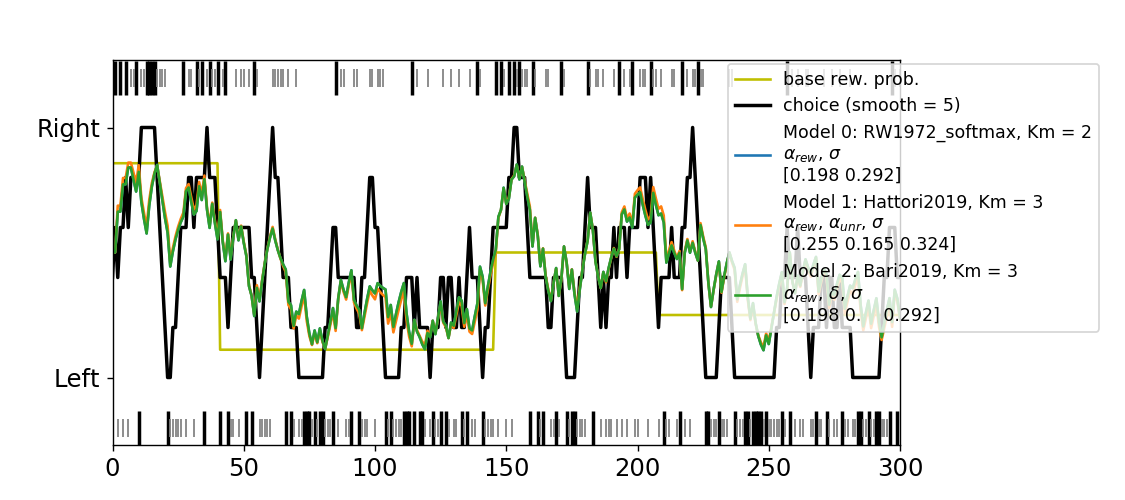

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
4,RW1972_softmax,2,1233.04,-0.00,1242.86,"$\alpha_{rew}$, $\sigma$","[0.198, 0.292]"
6,Hattori2019,3,1234.33,-0.28,1249.06,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.255, 0.165, 0.324]"
5,Bari2019,3,1235.04,-0.43,1249.76,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.198, 0.0, 0.292]"
7,Hattori2019,4,1236.33,-0.71,1255.96,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.255, 0.165, 0.0, 0.324]"
1,LNP_softmax,2,1264.53,-6.84,1274.35,"$\tau_1$, $\sigma$","[5.527, 0.315]"
2,LNP_softmax,4,1268.38,-7.67,1288.01,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[5.144, 29.055, 0.891, 0.305]"
3,RW1972_epsi,2,1280.64,-10.34,1290.45,"$\alpha_{rew}$, $\epsilon$","[0.259, 0.697]"
0,LossCounting,2,1416.01,-39.73,1425.83,"$\mu_{LC}$, $\sigma_{LC}$","[2.917, 10.0]"


In [3]:
fake_data = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature'], [0.2,0.3])
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 2513.56, BIC = 2524.76 (done in 8.16 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1799.04, BIC = 1810.24 (done in 7.04 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1802.03, BIC = 1824.44 (done in 14.2 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 2257.07, BIC = 2268.27 (done in 7.33 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 2046.83, BIC = 2058.04 (done in 5.47 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1800.31, BIC = 1817.11 (done in 14.4 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 2042.55, BIC = 2059.36 (done in 9.5 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1800.05, BIC = 1822.45 (done in 13.2 secs)


<IPython.core.display.Javascript object>


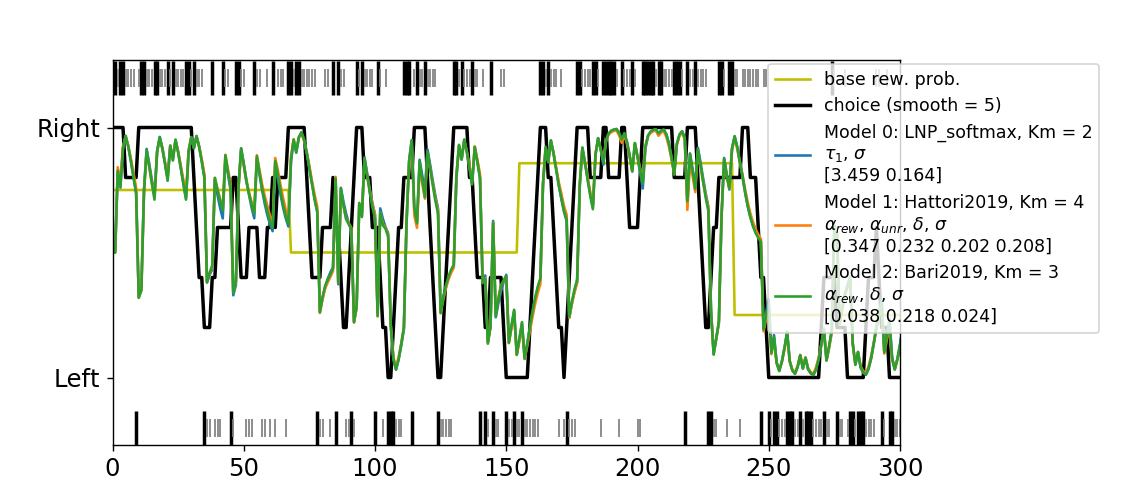

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
1,LNP_softmax,2,1799.04,-0.00,1810.24,"$\tau_1$, $\sigma$","[3.459, 0.164]"
7,Hattori2019,4,1800.05,-0.22,1822.45,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.347, 0.232, 0.202, 0.208]"
5,Bari2019,3,1800.31,-0.28,1817.11,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.038, 0.218, 0.024]"
2,LNP_softmax,4,1802.03,-0.65,1824.44,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[3.264, 29.897, 0.912, 0.157]"
6,Hattori2019,3,2042.55,-52.88,2059.36,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.099, 0.242, 0.09]"
4,RW1972_softmax,2,2046.83,-53.81,2058.04,"$\alpha_{rew}$, $\sigma$","[0.2, 0.153]"
3,RW1972_epsi,2,2257.07,-99.46,2268.27,"$\alpha_{rew}$, $\epsilon$","[0.185, 0.485]"
0,LossCounting,2,2513.56,-155.16,2524.76,"$\mu_{LC}$, $\sigma_{LC}$","[10.299, 10.0]"


In [5]:
fake_data = generate_fake_data('Hattori2019', ['learn_rate_rew','learn_rate_unrew', 'forget_rate','softmax_temperature'], 
                                                      [0.4, 0.2, 0.2, 0.23], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

Try to fit the behavior of some special foragers

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1399.7, BIC = 1409.52 (done in 5.38 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1390.38, BIC = 1400.2 (done in 1.99 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1394.56, BIC = 1414.19 (done in 2.94 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1390.07, BIC = 1399.89 (done in 4.6 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1390.29, BIC = 1400.11 (done in 1.29 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1392.29, BIC = 1407.02 (done in 1.46 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1392.36, BIC = 1407.08 (done in 1.86 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1394.05, BIC = 1413.68 (done in 8.5 secs)


<IPython.core.display.Javascript object>


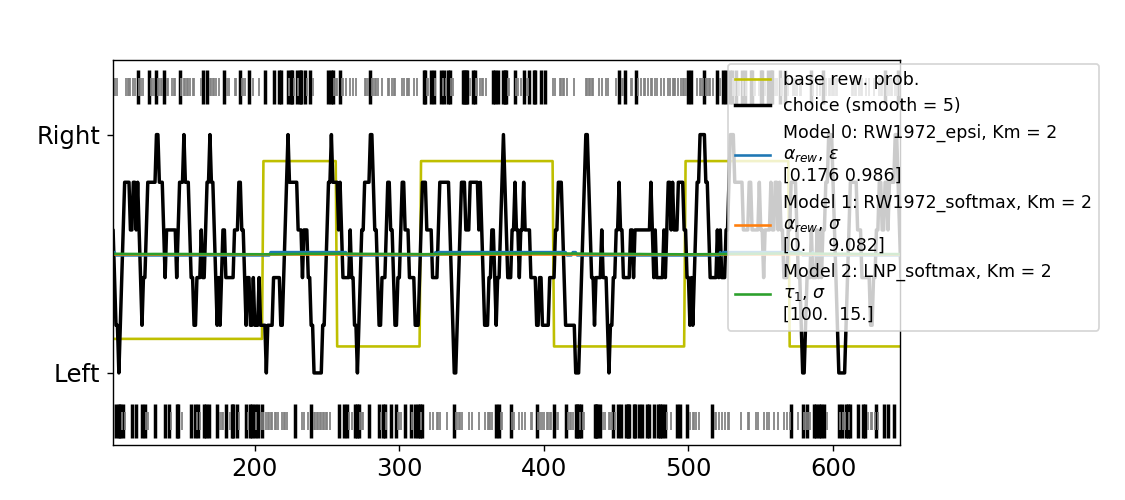

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
3,RW1972_epsi,2,1390.07,-0.00,1399.89,"$\alpha_{rew}$, $\epsilon$","[0.176, 0.986]"
4,RW1972_softmax,2,1390.29,-0.05,1400.11,"$\alpha_{rew}$, $\sigma$","[0.0, 9.082]"
1,LNP_softmax,2,1390.38,-0.07,1400.20,"$\tau_1$, $\sigma$","[100.0, 15.0]"
5,Bari2019,3,1392.29,-0.48,1407.02,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.0, 0.804, 8.797]"
6,Hattori2019,3,1392.36,-0.50,1407.08,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.894, 0.006, 8.956]"
7,Hattori2019,4,1394.05,-0.86,1413.68,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.0, 0.109, 1.0, 0.01]"
2,LNP_softmax,4,1394.56,-0.97,1414.19,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[0.991, 40.0, 0.0, 15.0]"
0,LossCounting,2,1399.70,-2.09,1409.52,"$\mu_{LC}$, $\sigma_{LC}$","[1.529, 10.0]"


In [11]:
fake_data = generate_fake_data('Random', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

Note that these fittings cannot differentiate IdealpHatGreedy and pMatching.

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1402.55, BIC = 1412.36 (done in 6.25 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1254.4, BIC = 1264.22 (done in 3.43 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1258.4, BIC = 1278.03 (done in 6.71 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1388.15, BIC = 1397.97 (done in 3.42 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1382.26, BIC = 1392.07 (done in 5.2 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1257.43, BIC = 1272.15 (done in 4.24 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1381.47, BIC = 1396.19 (done in 7.86 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1242.87, BIC = 1262.51 (done in 5.06 secs)


<IPython.core.display.Javascript object>


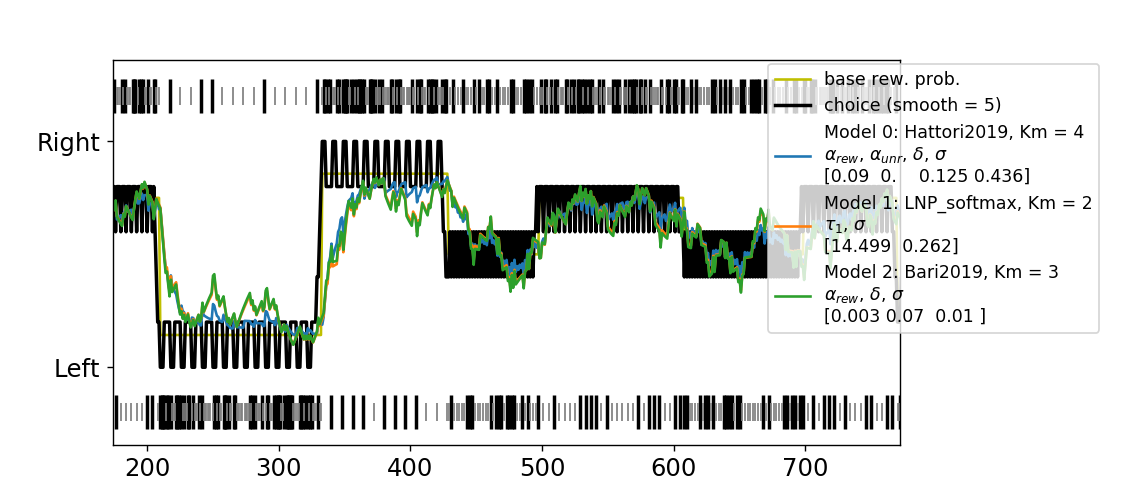

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
7,Hattori2019,4,1242.87,-0.00,1262.51,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.09, 0.0, 0.125, 0.436]"
1,LNP_softmax,2,1254.40,-2.50,1264.22,"$\tau_1$, $\sigma$","[14.499, 0.262]"
5,Bari2019,3,1257.43,-3.16,1272.15,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.003, 0.07, 0.01]"
2,LNP_softmax,4,1258.40,-3.37,1278.03,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[13.705, 14.498, 0.0, 0.262]"
6,Hattori2019,3,1381.47,-30.09,1396.19,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.102, 0.002, 0.303]"
4,RW1972_softmax,2,1382.26,-30.27,1392.07,"$\alpha_{rew}$, $\sigma$","[0.003, 0.183]"
3,RW1972_epsi,2,1388.15,-31.55,1397.97,"$\alpha_{rew}$, $\epsilon$","[0.003, 0.967]"
0,LossCounting,2,1402.55,-34.67,1412.36,"$\mu_{LC}$, $\sigma_{LC}$","[0.0, 10.0]"


In [13]:
fake_data = generate_fake_data('IdealpHatGreedy', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1314.08, BIC = 1323.89 (done in 5.6 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1050.04, BIC = 1059.85 (done in 3.88 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1054.04, BIC = 1073.67 (done in 6.58 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1336.53, BIC = 1346.35 (done in 3.28 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1288.16, BIC = 1297.98 (done in 3 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1053.99, BIC = 1068.71 (done in 7.96 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1287.4, BIC = 1302.12 (done in 4.8 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1014.92, BIC = 1034.55 (done in 7.13 secs)


<IPython.core.display.Javascript object>


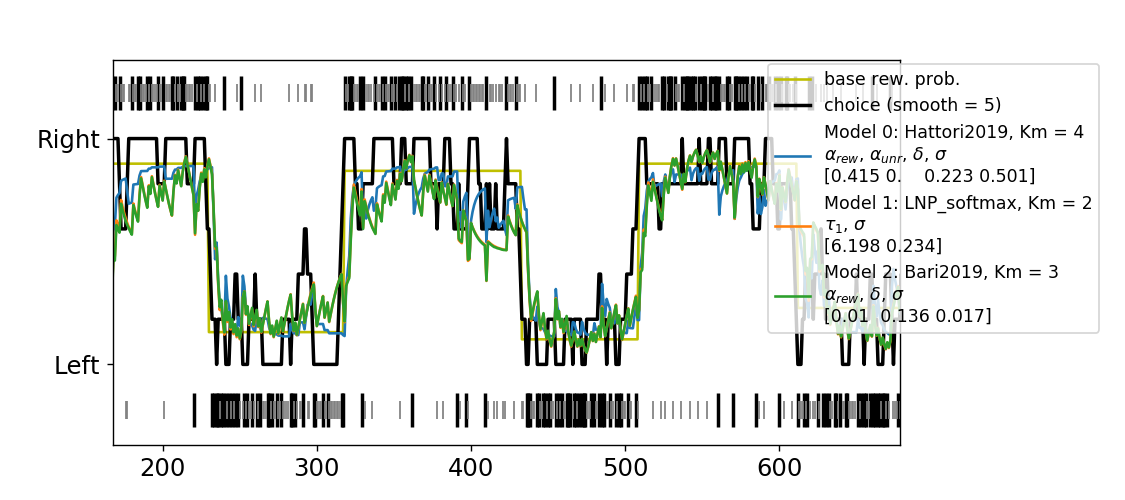

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
7,Hattori2019,4,1014.92,-0.00,1034.55,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.415, 0.0, 0.223, 0.501]"
1,LNP_softmax,2,1050.04,-7.63,1059.85,"$\tau_1$, $\sigma$","[6.198, 0.234]"
5,Bari2019,3,1053.99,-8.48,1068.71,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.01, 0.136, 0.017]"
2,LNP_softmax,4,1054.04,-8.49,1073.67,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[6.198, 8.301, 1.0, 0.234]"
6,Hattori2019,3,1287.40,-59.17,1302.12,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.066, 0.336, 0.153]"
4,RW1972_softmax,2,1288.16,-59.33,1297.98,"$\alpha_{rew}$, $\sigma$","[0.206, 0.365]"
0,LossCounting,2,1314.08,-64.96,1323.89,"$\mu_{LC}$, $\sigma_{LC}$","[8.303, 10.0]"
3,RW1972_epsi,2,1336.53,-69.84,1346.35,"$\alpha_{rew}$, $\epsilon$","[0.388, 0.78]"


In [12]:
fake_data = generate_fake_data('pMatching', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

# 2. Confusion matrix and Inversion matrix